In [210]:
%matplotlib inline

In [211]:
# Import dependencies.
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as sts

In [212]:
# Files to load
city_data_to_load = os.path.join(".","Resources", "city_data.csv")
ride_data_to_load = os.path.join(".","Resources", "ride_data.csv")


In [213]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [214]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [215]:
# Summary DataFrame
# Step 1: From the merged DataFrame get the total rides, total drivers, 
# and total fares for each city type using the groupby() function on the city type.

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [216]:
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [217]:
# Total fare by type
sum_fares_by_type  = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [218]:
# Total rides by type
# print(suburban_cities_df["type"].count())
sum_ride_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
sum_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [219]:
# Total drivers by type
sum_driver_by_type = city_data_df.groupby(['type']).sum()['driver_count']
sum_driver_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [220]:
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [221]:
type_of_city = pyber_data_df['type'].unique()
type_of_city

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [222]:
# summary DataFrame
pyber_summary_df = pd.DataFrame({
    "Total Rides" : sum_ride_by_type ,
    "Total Drivers": sum_driver_by_type,
    "Total Fares" : sum_fares_by_type,
    "Average Fare per Ride" : (sum_fares_by_type/ sum_ride_by_type).map("${:,.2f}".format),
    "Average Fare per Driver" : (sum_fares_by_type/ sum_driver_by_type).map("${:,.2f}".format)
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


In [223]:
pyber_summary_df.columns

Index(['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride',
       'Average Fare per Driver'],
      dtype='object')

In [224]:
print(pyber_summary_df.index.name)

type


In [225]:
# Step 1: Delete the index name
pyber_summary_df = pyber_summary_df.rename_axis(None)

In [226]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


In [227]:
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [228]:
# Step 1: Rename columns 
# {'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}.
rename_cols = {'city':'City', 'date':'Date','fare':'Fare', 
               'ride_id': 'Ride Id','driver_count': 'No. Drivers', 
               'type':'City Type'}
pyber_data_rename_df = pyber_data_df.rename(columns=rename_cols)
pyber_data_rename_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [229]:
# Step 2: Set the index to the Date column.
pyber_data_rename_df = pyber_data_rename_df.set_index(["Date"])
pyber_data_rename_df 

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [234]:
# Step 3: Create a new DataFrame, like the one below, for fares, and include only the City Type and Fare columns 
# using the copy() method on the merged DataFrame.
selected_columns = pyber_data_rename_df[["City Type", "Fare"]]
citytype_fare_df = selected_columns.copy()
print(citytype_fare_df)

                    City Type   Fare
Date                                
2019-01-14 10:14:22     Urban  13.83
2019-03-04 18:24:09     Urban  30.24
2019-02-24 04:29:00     Urban  33.44
2019-02-10 23:22:03     Urban  23.44
2019-03-06 04:28:35     Urban  34.58
...                       ...    ...
2019-04-29 17:04:39     Rural  13.38
2019-01-30 00:05:47     Rural  20.76
2019-02-10 21:03:50     Rural  11.11
2019-05-07 19:22:15     Rural  44.94
2019-04-25 10:20:13     Rural  55.84

[2375 rows x 2 columns]


In [235]:
# Steo 4: Set the index to the datetime data type.
citytype_fare_df.index = pd.to_datetime(citytype_fare_df.index)

In [236]:
# Check to make sure the index is a datetime data type by using the info() method on the DataFrame.
citytype_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [237]:
# Step 5 & Step 6: Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
sum_of_fare = pd.DataFrame(citytype_fare_df.groupby(['Date', 'City Type']).sum()['Fare']).reset_index()
sum_of_fare

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [238]:
type(sum_of_fare)

pandas.core.frame.DataFrame

In [239]:
# Step 7: Reset the index, then create a pivot table DataFrame with the Date as the index and columns = 'City Type'. 
# The Fare for each Date should appear in each row.
sum_pivot = sum_of_fare.pivot(index='Date', columns='City Type')["Fare"]
sum_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [154]:
type(sum_pivot)

pandas.core.frame.DataFrame

In [240]:
# Step 8: Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.
start = '2019-01-01'
end = '2019-04-28'
sum_pivot_date_df = sum_pivot.loc[start:end]
sum_pivot_date_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [241]:
type(sum_pivot_date_df)

pandas.core.frame.DataFrame

In [242]:
type(sum_pivot_date_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [243]:
sum_pivot_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [244]:
# Step 9: Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, 
# and calculate the sum() of the fares for each week in the resampled data.
weekly_sum_df = sum_pivot_date_df.resample('W').sum()
weekly_sum_df


City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [248]:
weekly_sum_df.columns

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='City Type')

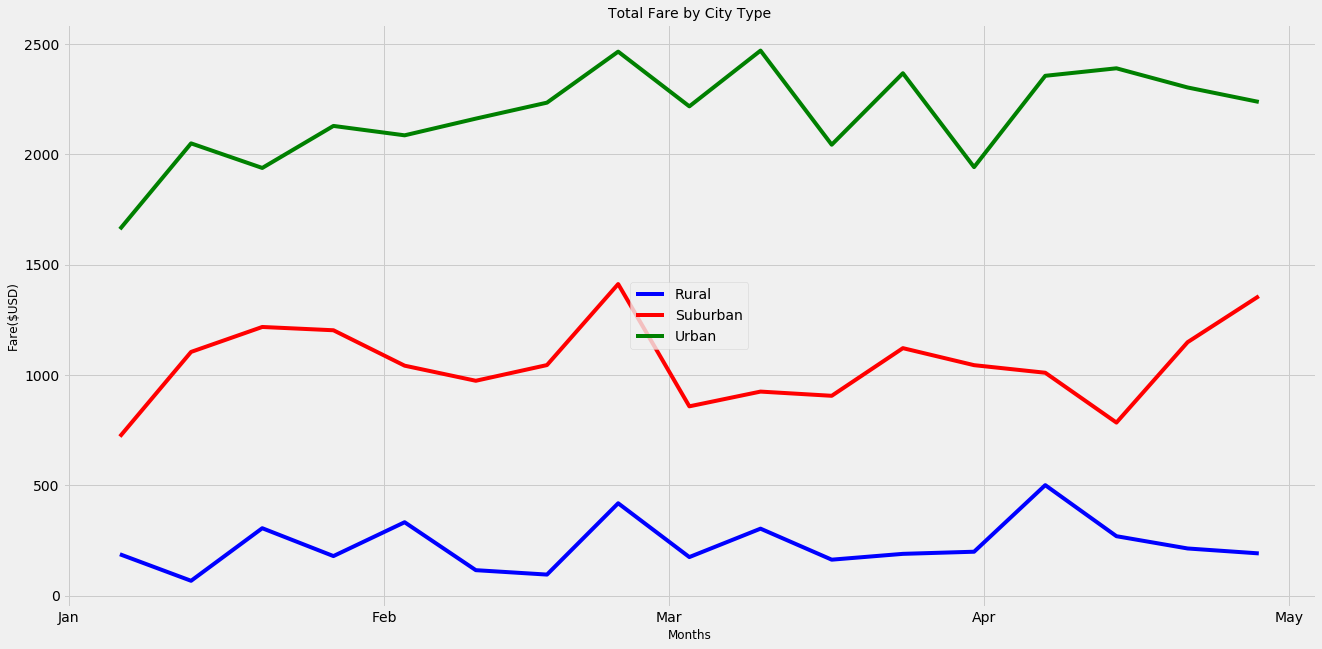

In [305]:
# Step 10: Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function. 
# Things to consider with your plotting:

import matplotlib.dates as mdates

months = mdates.MonthLocator()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,10))


plot_rural, = ax.plot(weekly_sum_df['Rural'], color='b', label='Rural')
plot_suburban, = ax.plot(weekly_sum_df['Suburban'], color='r', label='Suburban')
plot_urban, = ax.plot(weekly_sum_df['Urban'], color='g', label='Urban')
ax.set_title("Total Fare by City Type" ,fontsize=14)
ax.set_ylabel("Fare($USD)",fontsize=12)
ax.set_xlabel("Months",fontsize=12)

# month_format = mdates.DateFormatter("%b\n%Y")
# month_format = mdates.DateFormatter("%b")
# year_format = mdates.DateFormatter("%Y")

month_format = mdates.DateFormatter("%b")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_format)

plt.legend(handles=[plot_rural, plot_suburban, plot_urban],loc="center")

file_name = os.path.join(".", "analysis", "TotalFareByCity.png")
plt.savefig(file_name)

plt.show()